# The Normal Equation

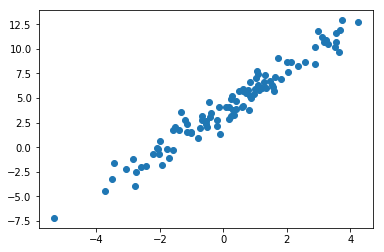

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

X = 2*np.random.randn(100, 1)
y = 4 + 2 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.show()